# **AI Meme Data Classification**
<hr><hr>

## Problem statement :
<hr>
The project aims to test the existing neural network algorithm for image classification of Meme images which are very similar to each other.

*The entire project takes 12-15 minutes to run in GPU environment.*

Dataset reference is taken from kaggle: 

-> Dataset : [Chihuaha Vs Muffin](https://www.kaggle.com/datasets/returnofsputnik/chihuahua-or-muffin)

-> Dataset : [Dog Vs Bagel](https://www.kaggle.com/datasets/returnofsputnik/puppy-or-bagel)

Meme 1:  Chihuaha Vs Muffin

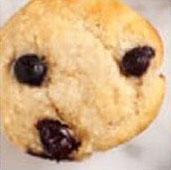 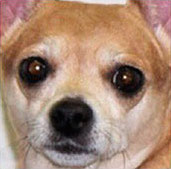

Meme 2: Dog Vs Bagel

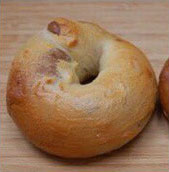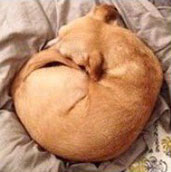


# Uploading data:
<hr>

We have uploaded Meme images in a webserver for the ease of use, we will call the zip file and unzip it.

In [2]:
!wget www.sanjay.ie/aditya/BACKUP.zip

--2022-07-28 16:59:34--  http://www.sanjay.ie/aditya/BACKUP.zip
Resolving www.sanjay.ie (www.sanjay.ie)... 81.16.28.117
Connecting to www.sanjay.ie (www.sanjay.ie)|81.16.28.117|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 377042 (368K) [application/zip]
Saving to: ‘BACKUP.zip’

BACKUP.zip          100%[===================>] 368.21K   902KB/s    in 0.4s    

2022-07-28 16:59:35 (902 KB/s) - ‘BACKUP.zip’ saved [377042/377042]



In [3]:
#Unzip the file which we called
!unzip /content/BACKUP.zip

Archive:  /content/BACKUP.zip
   creating: BACKUP/
   creating: BACKUP/Bagel/
  inflating: BACKUP/Bagel/bagel-1.jpg  
  inflating: BACKUP/Bagel/bagel-2.jpg  
  inflating: BACKUP/Bagel/bagel-3.jpg  
  inflating: BACKUP/Bagel/bagel-4.jpg  
  inflating: BACKUP/Bagel/bagel-5.jpg  
  inflating: BACKUP/Bagel/bagel-6.jpg  
  inflating: BACKUP/Bagel/bagel-7.jpg  
  inflating: BACKUP/Bagel/bagel-8.jpg  
   creating: BACKUP/BagelDog/
  inflating: BACKUP/BagelDog/dog-1.jpg  
  inflating: BACKUP/BagelDog/dog-2.jpg  
  inflating: BACKUP/BagelDog/dog-3.jpg  
  inflating: BACKUP/BagelDog/dog-4.jpg  
  inflating: BACKUP/BagelDog/dog-5.jpg  
  inflating: BACKUP/BagelDog/dog-6.jpg  
  inflating: BACKUP/BagelDog/dog-7.jpg  
  inflating: BACKUP/BagelDog/dog-8.jpg  
   creating: BACKUP/Chihuaha/
  inflating: BACKUP/Chihuaha/chihuahua-1.jpg  
  inflating: BACKUP/Chihuaha/chihuahua-2.jpg  
  inflating: BACKUP/Chihuaha/chihuahua-3.jpg  
  inflating: BACKUP/Chihuaha/chihuahua-4.jpg  
  inflating: BACKUP/Chihua

## Libraries used for the project:
<hr>

In Google colab supports most of the Machine learning libraries available in the market since its based on python. For our project, we will just need to call the below libraries. 

In [18]:
#!rm -rf BACKUP.zip
#!rm -rf BACKUP/
#!rm -rf GeneratedImages/
#!rm -rf ModelImg/
#install all libraries as mentioned in readme
!pip install colorama
import warnings
warnings.filterwarnings('ignore')
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob
import keras
import seaborn as sns
import colorama
import tensorflow

#Using below functions from imported libraries
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import load_img, img_to_array
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files
from IPython.display import Image
from colorama import Fore

#Setting seed 
np.random.seed(123)
#random.seed(123)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Setting up the stage with all directories, where the images will be saved in the colab directory.

In [5]:
# Setting up the directories which will be used later
path = '/content/BACKUP'
data_dir_1 = '/content/BACKUP'
savedir_1 = '/content/GeneratedImages/MEME'
ModelPath_1 = '/content/ModelImg/MEME'

#Creating the directories
os.mkdir('/content/GeneratedImages/')
os.mkdir('/content/ModelImg/')
os.mkdir(savedir_1)
os.mkdir(ModelPath_1)


The dataset images we got online is very small. For each class there is 8 images, hence there is a need of sampling more images for training the model. 

In [6]:
# Types of classes we want to differentiate
types = ["Bagel","BagelDog","Chihuaha","Muffin"]
nimgs = {}
for i in types:
    nimages = len(os.listdir(os.path.join(data_dir_1,i)))
    nimgs[i]=nimages
print(nimgs)

{'Bagel': 8, 'BagelDog': 8, 'Chihuaha': 8, 'Muffin': 8}


## Image Data Generator:
<hr>

For these specific memes, we have 8 images per class, which is not enough for training the Model. Hence the image data generator feature from python is employed to create multiple images. Here will rotate, shift, increase/decrease height, rescale, zoom.

Using this the Image Data Generator can create hundreds of unique images.

In [7]:
#Using Image datagenerator feature to increase the number of images, we can use this feature directly while modelling, but showing this seperately to display the difference
datagen = ImageDataGenerator(
        rotation_range=50,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')


def GenImage(origin,destination,types):
  #Run for all the classes
  for filename in types:
      #Stoing path and creating the directory
      directory = os.path.join(origin,filename)
      os.mkdir(os.path.join(destination,filename))
      #Taking one image, converting it to array, then modifyinh it and finally doing this process 200 times to create 200 images out of one
      for pic in os.listdir(directory):
          picture = os.path.join(directory, pic) 
          picuse = load_img(picture)
          pic_array = img_to_array(picuse)
          X = pic_array.reshape((1,) + pic_array.shape) # Converting into 4 dimension array
          count = 0
          for batch in datagen.flow(X, batch_size=1,save_to_dir=os.path.join(destination,filename), save_prefix=filename, save_format='jpeg'):
              count += 1
              if count > 201:
                  break

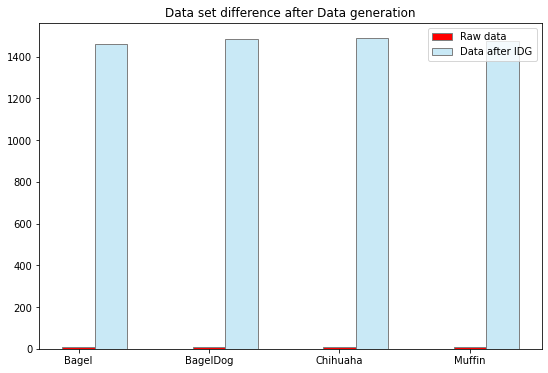

In [8]:
#Generating images here
GenImage(data_dir_1,savedir_1,types)

#Plotting the difference
nimgs = {}
genimgs = {}
for i in types:
    nimages = len(os.listdir(os.path.join(data_dir_1,i)))
    nimgs[i]=nimages
    nimages = len(os.listdir(os.path.join(savedir_1,i)))
    genimgs[i]=nimages

barWidth = 0.25
br1 = np.arange(len(nimgs))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.figure(figsize=(9, 6))
plt.bar(br1, list(nimgs.values()) , width = barWidth,
        edgecolor ='grey', color ='r', label ='Raw data')
plt.bar(br2,list(genimgs.values()), width = barWidth,
        edgecolor ='grey', color ='#c9e9f6', label ='Data after IDG')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Data set difference after Data generation')
plt.legend(loc="upper right")
plt.show()

After Image data generation there is a huge difference in samples now. All images are unique and is ready for training & testing images.

Since we have achieved this now, the data can be distributed into: 
<ul>

<li>60% =  Training set</li>
<li>20% = Validation set</li>
<li>20% = Test set</li>
</ul>

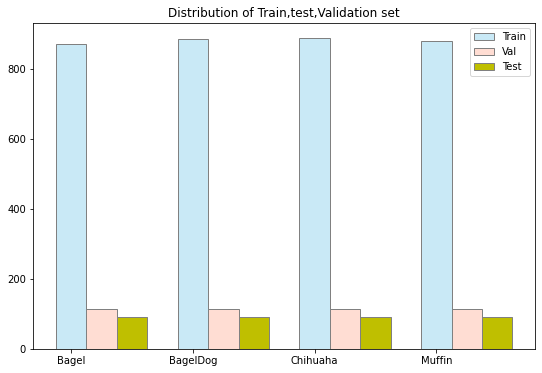

In [9]:
#Code to split data
def datafolder(origin,destination,types,split,name):
  for filename in types:
    directory = os.path.join(origin,filename)
    os.mkdir(os.path.join(destination,name,filename))
    for img in np.random.choice(a=os.listdir(directory),
                                   size=(math.floor(split*len(os.listdir(directory)))-5),
                                   replace=False):
      O = os.path.join(directory,img)
      D = os.path.join(destination,name,filename)
      shutil.copy(O,D)
      os.remove(O)
#First creating the folders and then adding image to it
os.mkdir(os.path.join(ModelPath_1,"train"))
datafolder(savedir_1,ModelPath_1,types,0.60,"train")
os.mkdir(os.path.join(ModelPath_1,"val"))
datafolder(savedir_1,ModelPath_1,types,0.20,"val")
os.mkdir(os.path.join(ModelPath_1,"test"))
datafolder(savedir_1,ModelPath_1,types,0.20,"test")

# Plotting the dataset
trainimgs = {}
valimgs = {}
testimgs = {}
for i in types:
    nimages = len(os.listdir(os.path.join(ModelPath_1,"train",i)))
    trainimgs[i]=nimages
    nimages = len(os.listdir(os.path.join(ModelPath_1,"val",i)))
    valimgs[i]=nimages
    nimages = len(os.listdir(os.path.join(ModelPath_1,"test",i)))
    testimgs[i]=nimages
barWidth = 0.25
br1 = np.arange(len(nimgs))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.figure(figsize=(9, 6))
plt.bar(br1, list(trainimgs.values()) , width = barWidth,
        edgecolor ='grey', color ='#c9e9f6', label ='Train')
plt.bar(br2,list(valimgs.values()), width = barWidth,
        edgecolor ='grey', color ='#FFDDD3', label ='Val')
plt.bar(br3,list(testimgs.values()), width = barWidth,
        edgecolor ='grey', color ='y', label ='Test')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of Train,test,Validation set')
plt.legend(loc="upper right")
plt.show()

Displaying some ranom images created and stored in training set.

Bagel_0_9294.jpeg
Muffin_0_7480.jpeg
Bagel_0_2248.jpeg
Bagel_0_8269.jpeg
Chihuaha_0_9508.jpeg
Muffin_0_3092.jpeg
Muffin_0_947.jpeg
Chihuaha_0_4156.jpeg
Chihuaha_0_6482.jpeg
Bagel_0_5069.jpeg


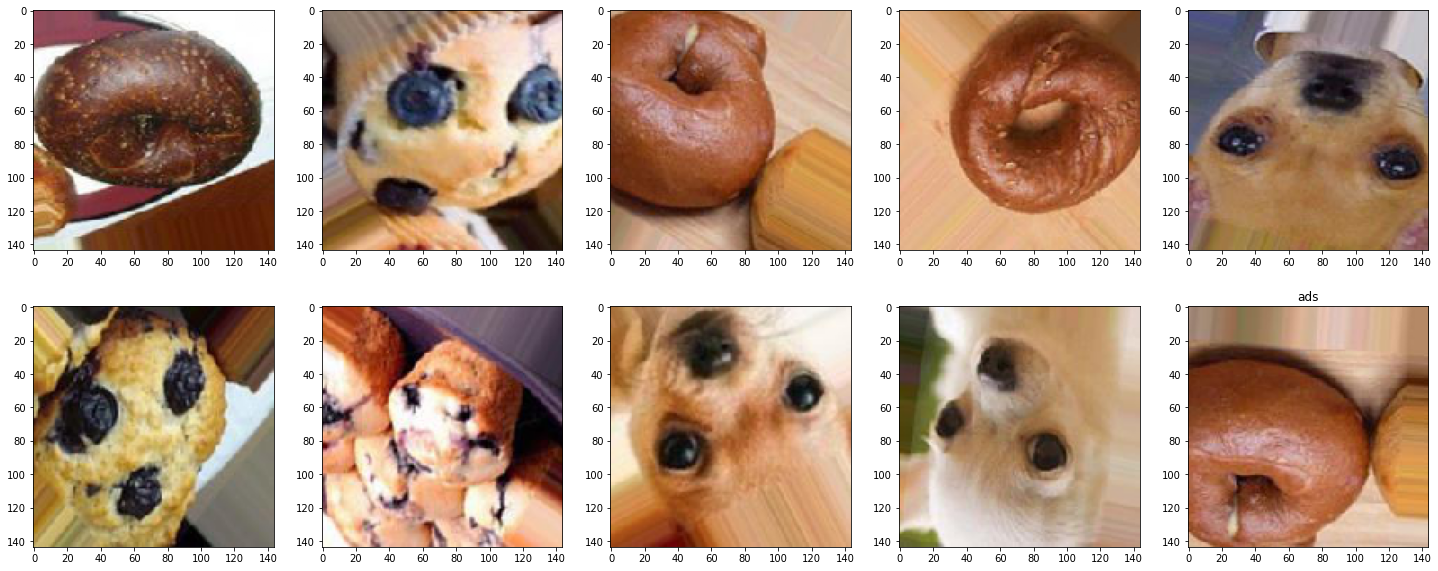

In [16]:
def Imgshow():
  type = random.choice(os.listdir(savedir_1))
  path  = os.path.join(savedir_1,type)
  randimg = random.choice(os.listdir(path))
  img = load_img(os.path.join(savedir_1,type,randimg), target_size=(144,144))
  input_arr = img_to_array(img)/255
  return(input_arr,randimg)
rows=2
cols = 5
show = 10
img_count = 0
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(25,10))
names=[]
for i in range(rows):
    for j in range(cols):        
        if img_count < show:
            randomImages = Imgshow()
            img = randomImages[0]
            name = randomImages[1]
            axes[i, j].imshow(img)
            img_count+=1
            names.append(name)
for i in range(10):
  print(names[i])

## Creating a Model :
<hr>

<ol><li>
Here, the model created has 5 convolution 2D layers with activation function as relu.</li><li>

The filter size is doubled in the consecutive layer to zoom into the image.
</li><li>
Maxpool 2d layer is used to select the significant to take the maximum value over an input window. Maxpool is used thrice in this model. 
</li><li>
The Dropout layer is used as a to remove 25%  of the unused/insignificant neurons, due to which their contribution to next layer is nullified. The rest of the neurons are kept active and unmodified. Dropout is used twice in the model.
</li><li>
Flatten layer is used to convert multidimensional output to make it linear to pass it onto a Dense layer.
</li><li>
In final dense layer softmax function is used as activation function, here n=4, since there are 4 classes to choose from.</li></ol>

In [17]:
ImageSize = 144
model = Sequential()
model.add(Conv2D(filters =16, kernel_size=(3,3), activation='relu', input_shape=(ImageSize,ImageSize,3) ))
model.add(Conv2D(filters =36, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters =64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters =128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(units=4, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 142, 142, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 140, 140, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 70, 70, 36)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 68, 68, 64)        20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 128)       7

In [19]:
#preprocessing the images before the classificaion and model training
batch_size = 32
def preprocessomgImagesTrain(path):
  image_data = ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1. / 255,horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path, target_size = (144,144), batch_size=batch_size, class_mode='categorical')
  return image

def preprocessomgImagesTest(path):
  image_data = ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1. / 255,horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path, target_size = (144,144), batch_size=batch_size, class_mode='categorical',shuffle = False)
  return image

#Compiling the model
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])


## Preprocessing Images:

<hr>
This is one of the most important steps, here, the images are all converted into same pixel size (144,144). Image datagenerator is again used so every time if same image is picked they will have some unique difference from previous one.

Finally the images are converted into array and stored in batches of 32.

The important difference between preprocessing of training and testing data is `shuffle=False`. This is used in testing phase so that the imagesare not radomly picked but in sequential order so that while predicting we can compare without randomization. 

In [20]:
path='/content/ModelImg/MEME/train'
train_Muffin= preprocessomgImagesTrain(path)

Found 3524 images belonging to 4 classes.


In [21]:
path='/content/ModelImg/MEME/val'
val_Muffin= preprocessomgImagesTest(path)

Found 457 images belonging to 4 classes.


In [22]:
path='/content/ModelImg/MEME/test'
test_Muffin= preprocessomgImagesTest(path)

Found 365 images belonging to 4 classes.


To reduce the time and increase the efficiency of the model we have introduced early stopping, wherein the validation accuracy is monitored and if the validation accuracy doesn't increase in 15 epochs, the model will be stopped. Also the best model is saved every iteration.

Epoch 1/100
16/16 [==============================] - 17s 356ms/step - loss: 1.4067 - accuracy: 0.3105 - val_loss: 1.3015 - val_accuracy: 0.3589
Epoch 2/100
16/16 [==============================] - 5s 336ms/step - loss: 1.2095 - accuracy: 0.4102 - val_loss: 1.1493 - val_accuracy: 0.4092
Epoch 3/100
16/16 [==============================] - 9s 555ms/step - loss: 1.1471 - accuracy: 0.4551 - val_loss: 1.0708 - val_accuracy: 0.4967
Epoch 4/100
16/16 [==============================] - 9s 569ms/step - loss: 1.1292 - accuracy: 0.4766 - val_loss: 1.1222 - val_accuracy: 0.4617
Epoch 5/100
16/16 [==============================] - 7s 435ms/step - loss: 0.9927 - accuracy: 0.5215 - val_loss: 0.8604 - val_accuracy: 0.5755
Epoch 6/100
16/16 [==============================] - 5s 332ms/step - loss: 0.8420 - accuracy: 0.6133 - val_loss: 0.7850 - val_accuracy: 0.6324
Epoch 7/100
 3/16 [====>.........................] - ETA: 2s - loss: 0.8402 - accuracy: 0.6354WARNING:tensorflow:Can save best model only wit

16/16 [==============================] - 5s 334ms/step - loss: 0.8544 - accuracy: 0.5868 - val_loss: 0.7907 - val_accuracy: 0.6193
Epoch 8/100
16/16 [==============================] - 5s 326ms/step - loss: 0.8106 - accuracy: 0.5820 - val_loss: 0.7697 - val_accuracy: 0.6411
Epoch 9/100
16/16 [==============================] - 5s 332ms/step - loss: 0.7260 - accuracy: 0.6250 - val_loss: 0.7669 - val_accuracy: 0.6586
Epoch 10/100
16/16 [==============================] - 8s 472ms/step - loss: 0.8016 - accuracy: 0.6211 - val_loss: 0.7316 - val_accuracy: 0.6565
Epoch 11/100
16/16 [==============================] - 6s 371ms/step - loss: 0.7597 - accuracy: 0.6133 - val_loss: 0.6514 - val_accuracy: 0.7265
Epoch 12/100
16/16 [==============================] - 5s 330ms/step - loss: 0.6879 - accuracy: 0.6582 - val_loss: 0.6528 - val_accuracy: 0.7352
Epoch 13/100
 7/16 [============>.................] - ETA: 3s - loss: 0.7297 - accuracy: 0.6473WARNING:tensorflow:Can save best model only with val_acc

16/16 [==============================] - 7s 464ms/step - loss: 0.7162 - accuracy: 0.6602 - val_loss: 0.6177 - val_accuracy: 0.7221
Epoch 14/100
16/16 [==============================] - 5s 319ms/step - loss: 0.6904 - accuracy: 0.6777 - val_loss: 0.6764 - val_accuracy: 0.7046
Epoch 15/100
16/16 [==============================] - 5s 330ms/step - loss: 0.7440 - accuracy: 0.6543 - val_loss: 0.7243 - val_accuracy: 0.6805
Epoch 16/100
16/16 [==============================] - 5s 324ms/step - loss: 0.6744 - accuracy: 0.7107 - val_loss: 0.6066 - val_accuracy: 0.7112
Epoch 17/100
16/16 [==============================] - 5s 330ms/step - loss: 0.6291 - accuracy: 0.7004 - val_loss: 0.5244 - val_accuracy: 0.7856
Epoch 18/100
16/16 [==============================] - 5s 337ms/step - loss: 0.4568 - accuracy: 0.8086 - val_loss: 0.4500 - val_accuracy: 0.8206
Epoch 19/100
11/16 [===================>..........] - ETA: 0s - loss: 0.5005 - accuracy: 0.7812WARNING:tensorflow:Can save best model only with val_a

16/16 [==============================] - 5s 329ms/step - loss: 0.5130 - accuracy: 0.7598 - val_loss: 0.4418 - val_accuracy: 0.8228
Epoch 20/100
16/16 [==============================] - 5s 319ms/step - loss: 0.5261 - accuracy: 0.7789 - val_loss: 0.4796 - val_accuracy: 0.8096
Epoch 21/100
16/16 [==============================] - 5s 330ms/step - loss: 0.6662 - accuracy: 0.7188 - val_loss: 0.5300 - val_accuracy: 0.7702
Epoch 22/100
16/16 [==============================] - 5s 333ms/step - loss: 0.6300 - accuracy: 0.7109 - val_loss: 0.4940 - val_accuracy: 0.7659
Epoch 23/100
16/16 [==============================] - 5s 329ms/step - loss: 0.5013 - accuracy: 0.7969 - val_loss: 0.4132 - val_accuracy: 0.8031
Epoch 24/100
16/16 [==============================] - 5s 329ms/step - loss: 0.5116 - accuracy: 0.7461 - val_loss: 0.4514 - val_accuracy: 0.7987
Epoch 25/100
15/16 [===========================>..] - ETA: 0s - loss: 0.5174 - accuracy: 0.7833WARNING:tensorflow:Can save best model only with val_a

16/16 [==============================] - 5s 335ms/step - loss: 0.5128 - accuracy: 0.7871 - val_loss: 0.3715 - val_accuracy: 0.8490
Epoch 26/100
16/16 [==============================] - 6s 354ms/step - loss: 0.4157 - accuracy: 0.8145 - val_loss: 0.3963 - val_accuracy: 0.8753
Epoch 27/100
16/16 [==============================] - 5s 331ms/step - loss: 0.4185 - accuracy: 0.8086 - val_loss: 0.3753 - val_accuracy: 0.8621
Epoch 28/100
16/16 [==============================] - 5s 334ms/step - loss: 0.4362 - accuracy: 0.8008 - val_loss: 0.4114 - val_accuracy: 0.8053
Epoch 29/100
16/16 [==============================] - 5s 332ms/step - loss: 0.4045 - accuracy: 0.8281 - val_loss: 0.3385 - val_accuracy: 0.8578
Epoch 30/100
16/16 [==============================] - 5s 330ms/step - loss: 0.3996 - accuracy: 0.8164 - val_loss: 0.3733 - val_accuracy: 0.8425
Epoch 31/100
16/16 [==============================] - 5s 332ms/step - loss: 0.4116 - accuracy: 0.8145 - val_loss: 0.3415 - val_accuracy: 0.8643
Epoch

16/16 [==============================] - 5s 331ms/step - loss: 0.4034 - accuracy: 0.7930 - val_loss: 0.2890 - val_accuracy: 0.8687
Epoch 33/100
16/16 [==============================] - 5s 333ms/step - loss: 0.3458 - accuracy: 0.8516 - val_loss: 0.2966 - val_accuracy: 0.8643
Epoch 34/100
16/16 [==============================] - 8s 501ms/step - loss: 0.3435 - accuracy: 0.8301 - val_loss: 0.2253 - val_accuracy: 0.9103
Epoch 35/100
16/16 [==============================] - 5s 330ms/step - loss: 0.3482 - accuracy: 0.8418 - val_loss: 0.2365 - val_accuracy: 0.9234
Epoch 36/100
16/16 [==============================] - 6s 362ms/step - loss: 0.4603 - accuracy: 0.7852 - val_loss: 0.2979 - val_accuracy: 0.8753
Epoch 37/100
16/16 [==============================] - 5s 337ms/step - loss: 0.3841 - accuracy: 0.8125 - val_loss: 0.2352 - val_accuracy: 0.9015
Epoch 38/100
 7/16 [============>.................] - ETA: 1s - loss: 0.3043 - accuracy: 0.8482WARNING:tensorflow:Can save best model only with val_a

16/16 [==============================] - 5s 339ms/step - loss: 0.3144 - accuracy: 0.8477 - val_loss: 0.3551 - val_accuracy: 0.8425
Epoch 39/100
16/16 [==============================] - 5s 335ms/step - loss: 0.3137 - accuracy: 0.8633 - val_loss: 0.1497 - val_accuracy: 0.9650
Epoch 40/100
16/16 [==============================] - 5s 341ms/step - loss: 0.2587 - accuracy: 0.8828 - val_loss: 0.1635 - val_accuracy: 0.9716
Epoch 41/100
16/16 [==============================] - 5s 336ms/step - loss: 0.2245 - accuracy: 0.9043 - val_loss: 0.1275 - val_accuracy: 0.9584
Epoch 42/100
16/16 [==============================] - 5s 335ms/step - loss: 0.2187 - accuracy: 0.9121 - val_loss: 0.1572 - val_accuracy: 0.9409
Epoch 43/100
16/16 [==============================] - 5s 335ms/step - loss: 0.2562 - accuracy: 0.8965 - val_loss: 0.1454 - val_accuracy: 0.9475
Epoch 44/100
11/16 [===================>..........] - ETA: 0s - loss: 0.2639 - accuracy: 0.8778WARNING:tensorflow:Can save best model only with val_a

16/16 [==============================] - 5s 335ms/step - loss: 0.3088 - accuracy: 0.8691 - val_loss: 0.1753 - val_accuracy: 0.9606
Epoch 45/100
16/16 [==============================] - 5s 334ms/step - loss: 0.3077 - accuracy: 0.8809 - val_loss: 0.1669 - val_accuracy: 0.9540
Epoch 46/100
16/16 [==============================] - 5s 335ms/step - loss: 0.2238 - accuracy: 0.9043 - val_loss: 0.1229 - val_accuracy: 0.9650
Epoch 47/100
16/16 [==============================] - 5s 333ms/step - loss: 0.2275 - accuracy: 0.9062 - val_loss: 0.1146 - val_accuracy: 0.9737
Epoch 48/100
16/16 [==============================] - 5s 336ms/step - loss: 0.2039 - accuracy: 0.9043 - val_loss: 0.1259 - val_accuracy: 0.9562
Epoch 49/100
16/16 [==============================] - 5s 336ms/step - loss: 0.1744 - accuracy: 0.9258 - val_loss: 0.0867 - val_accuracy: 0.9737
Epoch 50/100
15/16 [===========================>..] - ETA: 0s - loss: 0.2331 - accuracy: 0.9125WARNING:tensorflow:Can save best model only with val_a

16/16 [==============================] - 5s 333ms/step - loss: 0.2326 - accuracy: 0.9121 - val_loss: 0.1295 - val_accuracy: 0.9562
Epoch 51/100
16/16 [==============================] - 5s 334ms/step - loss: 0.2619 - accuracy: 0.9219 - val_loss: 0.1258 - val_accuracy: 0.9497
Epoch 52/100
16/16 [==============================] - 5s 337ms/step - loss: 0.1979 - accuracy: 0.9141 - val_loss: 0.1061 - val_accuracy: 0.9803
Epoch 53/100
16/16 [==============================] - 5s 336ms/step - loss: 0.1637 - accuracy: 0.9395 - val_loss: 0.1217 - val_accuracy: 0.9694
Epoch 54/100
16/16 [==============================] - 5s 330ms/step - loss: 0.4366 - accuracy: 0.8595 - val_loss: 0.2214 - val_accuracy: 0.9256
Epoch 55/100
16/16 [==============================] - 5s 335ms/step - loss: 0.4899 - accuracy: 0.7852 - val_loss: 0.4214 - val_accuracy: 0.7921
Epoch 56/100
16/16 [==============================] - 5s 329ms/step - loss: 0.3595 - accuracy: 0.8633 - val_loss: 0.2669 - val_accuracy: 0.8884
Epoch

16/16 [==============================] - 5s 338ms/step - loss: 0.2507 - accuracy: 0.8965 - val_loss: 0.1483 - val_accuracy: 0.9628
Epoch 58/100
16/16 [==============================] - 5s 335ms/step - loss: 0.1941 - accuracy: 0.9297 - val_loss: 0.0767 - val_accuracy: 0.9825
Epoch 59/100
16/16 [==============================] - 5s 334ms/step - loss: 0.1935 - accuracy: 0.9160 - val_loss: 0.2158 - val_accuracy: 0.9234
Epoch 60/100
16/16 [==============================] - 5s 336ms/step - loss: 0.1574 - accuracy: 0.9355 - val_loss: 0.0969 - val_accuracy: 0.9672
Epoch 61/100
16/16 [==============================] - 5s 332ms/step - loss: 0.1690 - accuracy: 0.9219 - val_loss: 0.0893 - val_accuracy: 0.9759
Epoch 62/100
16/16 [==============================] - 5s 335ms/step - loss: 0.1223 - accuracy: 0.9434 - val_loss: 0.0751 - val_accuracy: 0.9825
Epoch 63/100
 7/16 [============>.................] - ETA: 1s - loss: 0.0905 - accuracy: 0.9598WARNING:tensorflow:Can save best model only with val_a

16/16 [==============================] - 5s 339ms/step - loss: 0.1097 - accuracy: 0.9492 - val_loss: 0.0599 - val_accuracy: 0.9869
Epoch 64/100
16/16 [==============================] - 5s 343ms/step - loss: 0.1599 - accuracy: 0.9316 - val_loss: 0.0762 - val_accuracy: 0.9803
Epoch 65/100
16/16 [==============================] - 5s 331ms/step - loss: 0.2048 - accuracy: 0.9256 - val_loss: 0.0882 - val_accuracy: 0.9694
Epoch 66/100
16/16 [==============================] - 5s 347ms/step - loss: 0.1622 - accuracy: 0.9297 - val_loss: 0.0803 - val_accuracy: 0.9803
Epoch 67/100
16/16 [==============================] - 7s 464ms/step - loss: 0.1754 - accuracy: 0.9355 - val_loss: 0.0654 - val_accuracy: 0.9847
Epoch 68/100
16/16 [==============================] - 8s 500ms/step - loss: 0.1471 - accuracy: 0.9434 - val_loss: 0.0670 - val_accuracy: 0.9716
Epoch 69/100
11/16 [===================>..........] - ETA: 1s - loss: 0.1333 - accuracy: 0.9475WARNING:tensorflow:Can save best model only with val_a

16/16 [==============================] - 9s 576ms/step - loss: 0.1801 - accuracy: 0.9401 - val_loss: 0.1004 - val_accuracy: 0.9672
Epoch 70/100
16/16 [==============================] - 5s 340ms/step - loss: 0.2216 - accuracy: 0.9316 - val_loss: 0.1270 - val_accuracy: 0.9540
Epoch 71/100
16/16 [==============================] - 5s 333ms/step - loss: 0.1456 - accuracy: 0.9395 - val_loss: 0.0658 - val_accuracy: 0.9803
Epoch 72/100
16/16 [==============================] - 5s 338ms/step - loss: 0.1596 - accuracy: 0.9375 - val_loss: 0.1197 - val_accuracy: 0.9540
Epoch 73/100
16/16 [==============================] - 5s 334ms/step - loss: 0.1341 - accuracy: 0.9453 - val_loss: 0.0457 - val_accuracy: 0.9934
Epoch 74/100
16/16 [==============================] - 5s 332ms/step - loss: 0.0694 - accuracy: 0.9824 - val_loss: 0.0229 - val_accuracy: 0.9891
Epoch 75/100
15/16 [===========================>..] - ETA: 0s - loss: 0.0675 - accuracy: 0.9667WARNING:tensorflow:Can save best model only with val_a

16/16 [==============================] - 5s 333ms/step - loss: 0.0726 - accuracy: 0.9648 - val_loss: 0.0246 - val_accuracy: 0.9912
Epoch 76/100
16/16 [==============================] - 5s 333ms/step - loss: 0.0993 - accuracy: 0.9668 - val_loss: 0.0189 - val_accuracy: 0.9912
Epoch 77/100
16/16 [==============================] - 5s 322ms/step - loss: 0.0816 - accuracy: 0.9649 - val_loss: 0.0382 - val_accuracy: 0.9891
Epoch 78/100
16/16 [==============================] - 5s 326ms/step - loss: 0.1423 - accuracy: 0.9339 - val_loss: 0.2404 - val_accuracy: 0.9300
Epoch 79/100
16/16 [==============================] - 5s 330ms/step - loss: 0.1356 - accuracy: 0.9512 - val_loss: 0.1251 - val_accuracy: 0.9475
Epoch 80/100
16/16 [==============================] - 5s 335ms/step - loss: 0.1459 - accuracy: 0.9492 - val_loss: 0.1174 - val_accuracy: 0.9540
Epoch 81/100
16/16 [==============================] - 5s 339ms/step - loss: 0.1372 - accuracy: 0.9414 - val_loss: 0.0633 - val_accuracy: 0.9803
Epoch

16/16 [==============================] - 5s 340ms/step - loss: 0.0903 - accuracy: 0.9727 - val_loss: 0.0330 - val_accuracy: 0.9978
Epoch 83/100
16/16 [==============================] - 6s 380ms/step - loss: 0.0978 - accuracy: 0.9609 - val_loss: 0.0967 - val_accuracy: 0.9716
Epoch 84/100
16/16 [==============================] - 5s 337ms/step - loss: 0.1805 - accuracy: 0.9531 - val_loss: 0.0941 - val_accuracy: 0.9759
Epoch 85/100
16/16 [==============================] - 5s 328ms/step - loss: 0.1148 - accuracy: 0.9628 - val_loss: 0.0389 - val_accuracy: 0.9891
Epoch 86/100
16/16 [==============================] - 5s 338ms/step - loss: 0.1156 - accuracy: 0.9531 - val_loss: 0.0358 - val_accuracy: 0.9912
Epoch 87/100
16/16 [==============================] - 5s 335ms/step - loss: 0.0938 - accuracy: 0.9668 - val_loss: 0.0275 - val_accuracy: 0.9934
Epoch 88/100
 7/16 [============>.................] - ETA: 1s - loss: 0.0704 - accuracy: 0.9777WARNING:tensorflow:Can save best model only with val_a

16/16 [==============================] - 5s 336ms/step - loss: 0.0976 - accuracy: 0.9688 - val_loss: 0.0314 - val_accuracy: 0.9934
Epoch 89/100
16/16 [==============================] - 5s 336ms/step - loss: 0.0878 - accuracy: 0.9609 - val_loss: 0.0828 - val_accuracy: 0.9759
Epoch 90/100
16/16 [==============================] - 5s 338ms/step - loss: 0.0869 - accuracy: 0.9629 - val_loss: 0.0364 - val_accuracy: 0.9847
Epoch 91/100
16/16 [==============================] - 5s 329ms/step - loss: 0.0921 - accuracy: 0.9649 - val_loss: 0.0358 - val_accuracy: 0.9891
Epoch 92/100
16/16 [==============================] - 5s 337ms/step - loss: 0.0876 - accuracy: 0.9727 - val_loss: 0.0206 - val_accuracy: 0.9912
Epoch 93/100
16/16 [==============================] - 5s 334ms/step - loss: 0.0872 - accuracy: 0.9707 - val_loss: 0.0360 - val_accuracy: 0.9934
Epoch 94/100
11/16 [===================>..........] - ETA: 0s - loss: 0.0707 - accuracy: 0.9744WARNING:tensorflow:Can save best model only with val_a

16/16 [==============================] - 5s 337ms/step - loss: 0.0660 - accuracy: 0.9785 - val_loss: 0.0088 - val_accuracy: 0.9978
Epoch 95/100
16/16 [==============================] - 5s 327ms/step - loss: 0.1071 - accuracy: 0.9649 - val_loss: 0.0360 - val_accuracy: 0.9891
Epoch 96/100
16/16 [==============================] - 5s 341ms/step - loss: 0.0778 - accuracy: 0.9668 - val_loss: 0.0329 - val_accuracy: 0.9869
Epoch 97/100
16/16 [==============================] - 5s 334ms/step - loss: 0.1139 - accuracy: 0.9629 - val_loss: 0.0226 - val_accuracy: 0.9891
Epoch 97: early stopping


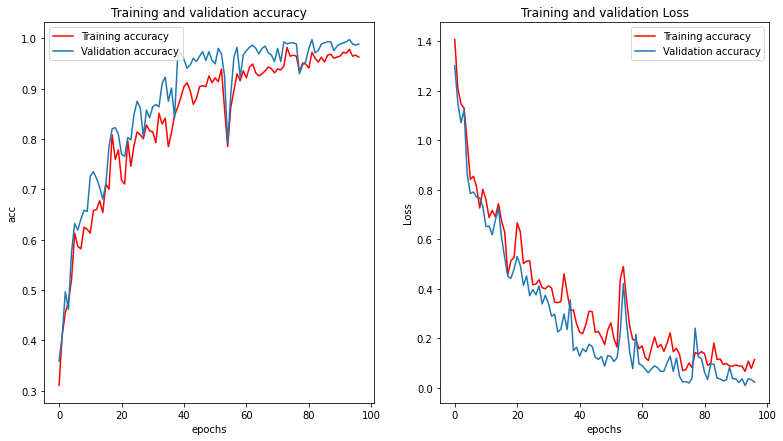

In [23]:
epochs=100
#early stopping and model checking introduced here
es = EarlyStopping(monitor="val_accuracy", patience=15, verbose = 1, mode="auto")
MuffinModel = ModelCheckpoint(filepath = "/content/model.h5", monitor = "val_accuracy", save_freq=epochs,  verbose=1, save_best_only = True)

cb = [es,MuffinModel]
#Runing the model
M_model = model.fit_generator(generator=train_Muffin,
                              steps_per_epoch=16,
                              epochs=epochs,
                              verbose=1,
                              validation_data=val_Muffin,
                              callbacks=cb)

#Plotting the accuracy and other key factors from the model  
acc = M_model.history['accuracy']
val = M_model.history['val_accuracy']
loss = M_model.history['loss']
val_loss = M_model.history['val_loss']
epochs = range(len(acc))


fig, (a1,a2) = plt.subplots(1, 2, figsize=(13,7))
a1.plot(epochs, acc, 'r', label='Training accuracy')
a1.plot(epochs, val,label='Validation accuracy')
a1.set_xlabel('epochs')
a1.set_ylabel('acc')
a1.set_title('Training and validation accuracy')

a1.legend(loc="upper left")

a2.plot(epochs, loss, 'r', label='Training accuracy')
a2.plot(epochs, val_loss,label='Validation accuracy')
a2.set_xlabel('epochs')
a2.set_ylabel('Loss')
a2.set_title('Training and validation Loss')

a2.legend(loc="upper right")



Model Performance for Validation model:

In [28]:
print(f"the accuracy of meme model in Validation set is {max(M_model.history['val_accuracy'])*100}% ")

the accuracy of meme model in Validation set is 99.78117942810059% 


## Checking our model on Test Data: 
<hr>


In [29]:

acc_m = model.evaluate_generator(test_Muffin)[1]
print(f"the accuracy of TESTING meme model is {acc_m*100}% ")


the accuracy of TESTING meme model is 99.72602725028992% 


Bagel
Chihuaha
Chihuaha
Dog
Dog
Bagel
Chihuaha
Bagel
Chihuaha
Bagel


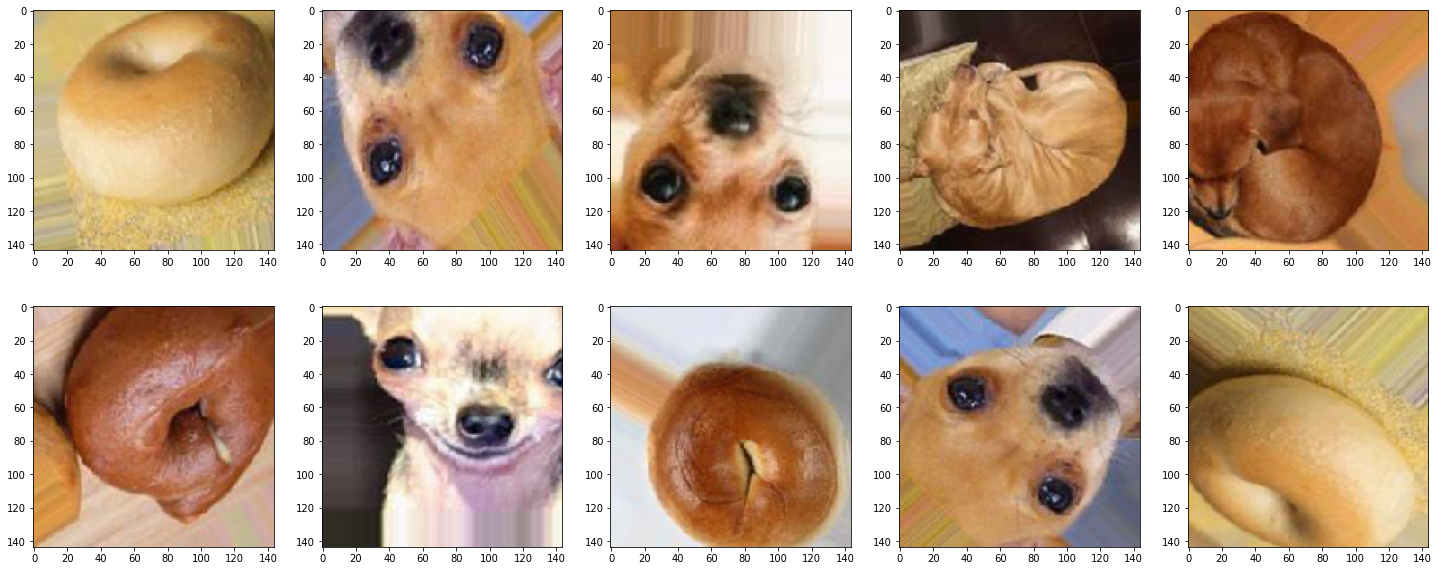

In [30]:
#Plotting the images in grid format
def predictImg():
  type = random.choice(os.listdir(savedir_1))
  path  = os.path.join(savedir_1,type)
  randimg = random.choice(os.listdir(path))
  img = load_img(os.path.join(savedir_1,type,randimg), target_size=(144,144))
  input_arr = img_to_array(img)/255
  return(input_arr)

rows=2
cols = 5
show = 10
img_count = 0
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(25,10))
names=[]
for i in range(rows):
    for j in range(cols):        
        if img_count < show:
            img = predictImg()
            axes[i, j].imshow(img)
            img_count+=1
            img = np.expand_dims(img,axis=0)
            pred=model.predict(img) 
            if pred[0][0] == max(pred[0]):
              names.append('Bagel')
            if pred[0][1] == max(pred[0]):
              names.append('Dog')
            if pred[0][2] == max(pred[0]):
              names.append('Chihuaha')
            if pred[0][3] == max(pred[0]):
              names.append('Muffin')
for i in range(10):
  print(names[i])

## Discussion based on predictions:
<hr>

Our model accuracy is close to 99% which is, near to perfect. As we observe in the confusion matrix below, we can observe how many images were incorrectly guessed and almost all images were correctly guessed hence almost all values are in diagonal element.

The accuracy for the images can be very much increasd if we get more new datasets which look-a-like to model to train. For now, using Image data generator has helped us overcome this challenge by sampling more images which are new for the machine to know.

In [31]:
mode = model.predict(test_Muffin)
answer = mode.argmax(axis=1)
print('Confusion Matrix')

mat = confusion_matrix(test_Muffin.classes, answer)
print(mat)
print('\n Classification Report')
print(classification_report(test_Muffin.classes, answer, target_names=types))

Confusion Matrix
[[90  0  0  0]
 [ 0 92  0  0]
 [ 0  0 92  0]
 [ 0  0  1 90]]

 Classification Report
              precision    recall  f1-score   support

       Bagel       1.00      1.00      1.00        90
    BagelDog       1.00      1.00      1.00        92
    Chihuaha       0.99      1.00      0.99        92
      Muffin       1.00      0.99      0.99        91

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365



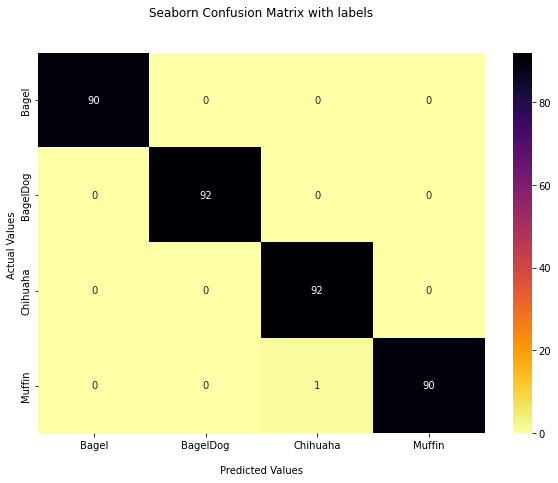

In [32]:
#Plotting the confusion matrix
plt.figure(figsize=(10,7))
ax = sns.heatmap(mat, annot=True, cmap='inferno_r')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(types)
ax.yaxis.set_ticklabels(types)

## Display the visualization of the Confusion Matrix.
plt.show()

## GUI to test the Model:

Upload an image from the meme and it will give the prediction, you can re-run this multiple times.

Saving bagel-1.jpg to bagel-1.jpg


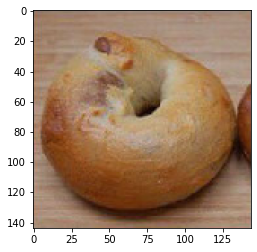



                                I think its 98.49809408187866% Bagel                                


In [33]:
uploaded = files.upload()

def ImageName(uploaded):
  for fn in uploaded.keys():
    picname = fn
    return picname


pic_name = ImageName(uploaded)

from keras.preprocessing.image import load_img, img_to_array
path = os.path.join('/content',pic_name)
img = load_img(path, target_size=(144,144))

input_arr = img_to_array(img)/255
plt.imshow(input_arr)
plt.show()


input_arr = np.expand_dims(input_arr,axis=0)
#pred = model.predict_classes(input_arr)
pred=model.predict(input_arr) 
classes_x=np.argmax(input_arr,axis=1)
prob = str(max(pred[0])*100)
print('\n')
if pred[0][0] == max(pred[0]):
  print(Fore.RED + ("I think its "+ prob +"% Bagel").center(100))
if pred[0][1] == max(pred[0]):
  print(Fore.RED + ("I think its " + prob + "% Dog looking like Bagel").center(100))
if pred[0][2] == max(pred[0]):
  print(Fore.RED + ("I think its " + prob +"% Chihuaha Dog").center(100))
if pred[0][3] == max(pred[0]):
  print(Fore.RED + ("I think its " + prob +"% Muffin").center(100))